Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

Read the female respondent file.

In [1]:
%matplotlib inline

import chap01soln
resp = chap01soln.ReadFemResp()

Make a PMF of <tt>numkdhh</tt>, the number of children under 18 in the respondent's household.

In [2]:
import thinkstats2
pmf = thinkstats2.Pmf(resp.numkdhh)

Display the PMF.

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


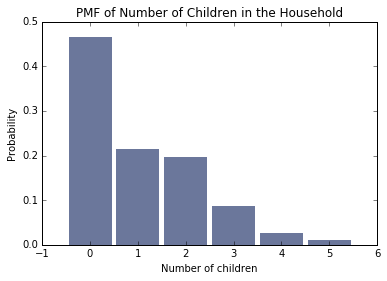

In [3]:
import thinkplot
thinkplot.Hist(pmf)
thinkplot.Config(
    title='PMF of Number of Children in the Household',
    xlabel='Number of children',
    ylabel='Probability'
)

Define <tt>BiasPmf</tt>.

In [4]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

Make a the biased Pmf of children in the household, as observed if you surveyed the children instead of the respondents.

In [5]:
biased_pmf = BiasPmf(pmf)

Display the actual Pmf and the biased Pmf on the same axes.

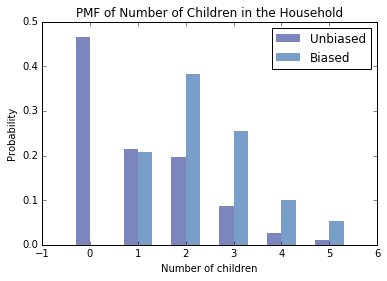

In [6]:
thinkplot.Hist(pmf, label='Unbiased', align='right', width=0.3)
thinkplot.Hist(biased_pmf, label='Biased', align='left', width=0.3)
thinkplot.Config(
    title='PMF of Number of Children in the Household',
    xlabel='Number of children',
    ylabel='Probability'
)

Compute the means of the two Pmfs.

In [7]:
print 'Unbiased mean:', pmf.Mean()
print 'Biased mean:  ', biased_pmf.Mean()

Unbiased mean: 1.02420515504
Biased mean:   2.40367910066


The biasing has quite a large effect on the data!

### ThinkStats Chapter 3, Exercise 3

I started with the question, “Are first babies more likely to be late?” To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two babies and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use nsfg.MakePregMap.

In [8]:
import nsfg
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]
preg_map = nsfg.MakePregMap(live)

In [9]:
from numpy import mean
diffs = []
for caseid in preg_map.keys():
    if len(preg_map[caseid]) >= 2:
        pregs = live.loc[preg_map[caseid]]
        firsts = pregs[pregs.birthord == 1]
        others = pregs[pregs.birthord != 1]
        diffs.append(firsts.prglngth.mean() - others.prglngth.mean())
print mean(diffs)

0.118079718549


For the pairwise differences, the mean is 0.118 weeks or 19.824 hours.  When calculated for the groups as a whole, the difference of the means was 0.078 weeks or 13.104 hours.  The different approach yielded a different result (over 50% different, even)!

### Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

When would you _want_ to bias the PMF?  It seems like having to _unbias_ your data would be more common.

### Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

### Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.